In [68]:
import csv

city = "city.csv"
with open(city, encoding='utf-8')as f:
    reader = csv.reader(f)
    headers = next(reader)
    #print(headers)
    count  = 0
    for row in reader:
        row_xy = np.asarray(row[1:3],dtype=np.float32)
        row_n = np.array(row[0])
        if count == 0:
            data = row_xy
            name = row_n
        else:
            data = np.vstack((data,row_xy))
            name = np.vstack((name, row_n))
        count = count + 1

f.close
   



[[126.64246   45.756966]
 [125.3245    43.88684 ]
 [ 87.61688   43.82663 ]
 [123.42909   41.79677 ]
 [111.75199   40.84149 ]
 [116.40529   39.904987]
 [117.190186  39.125595]
 [106.23248   38.48644 ]
 [114.502464  38.045475]
 [112.54925   37.857014]
 [117.00092   36.675808]
 [101.77782   36.61729 ]
 [103.83417   36.06138 ]
 [113.66541   34.757977]
 [108.94802   34.26316 ]
 [118.76741   32.041546]
 [117.28304   31.86119 ]
 [121.47264   31.231707]
 [104.065735  30.659462]
 [114.29857   30.584354]
 [120.15358   30.287458]
 [ 91.1145    29.64415 ]
 [106.50496   29.533155]
 [115.89215   28.676493]
 [112.98228   28.19409 ]
 [106.71348   26.578342]
 [119.30624   26.075302]
 [102.71225   25.04061 ]
 [121.52007   25.030724]
 [113.28064   23.125177]
 [108.32001   22.82402 ]
 [114.16546   22.27534 ]
 [113.54913   22.19875 ]
 [110.19989   20.04422 ]]
[['哈尔滨市']
 ['长春市']
 ['乌鲁木齐市']
 ['沈阳市']
 ['呼和浩特市']
 ['北京市']
 ['天津市']
 ['银川市']
 ['石家庄市']
 ['太原市']
 ['济南市']
 ['西宁市']
 ['兰州市']
 ['郑州市']
 ['西安市']
 ['南京市']

<function TextIOWrapper.close()>

第2367次迭代找到的次优解距离为：216.35402882099152，能量为：10559.776367235223，路径为：
o,s,w,z,y,},{,u,q,k,g,f,i,c,l,v,m,|,,,,,~,x,a,b,d,r,p,t,n,j,e,h,o
第3506次迭代找到的次优解距离为：207.14354646205902，能量为：3625.815514159726，路径为：
s,w,z,y,},{,u,q,k,g,f,i,c,l,m,v,|,,,,,~,x,a,b,d,r,p,t,n,j,e,h,o,s
第8679次迭代找到的次优解距离为：190.85528123378754，能量为：2447.078770941935，路径为：
z,y,},{,u,q,k,g,f,i,m,l,c,v,|,,,,,~,x,a,b,d,r,p,t,n,j,e,h,o,s,w,z


D:\yzc\anaconda3\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36149 (\N{CJK UNIFIED IDEOGRAPH-8D35}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\yzc\anaconda3\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38451 (\N{CJK UNIFIED IDEOGRAPH-9633}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\yzc\anaconda3\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\yzc\anaconda3\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\yzc\anaconda3\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27801 (\N{CJK UNIFIED IDEOGRAPH-6C99}) missing from current font.
  fig.c

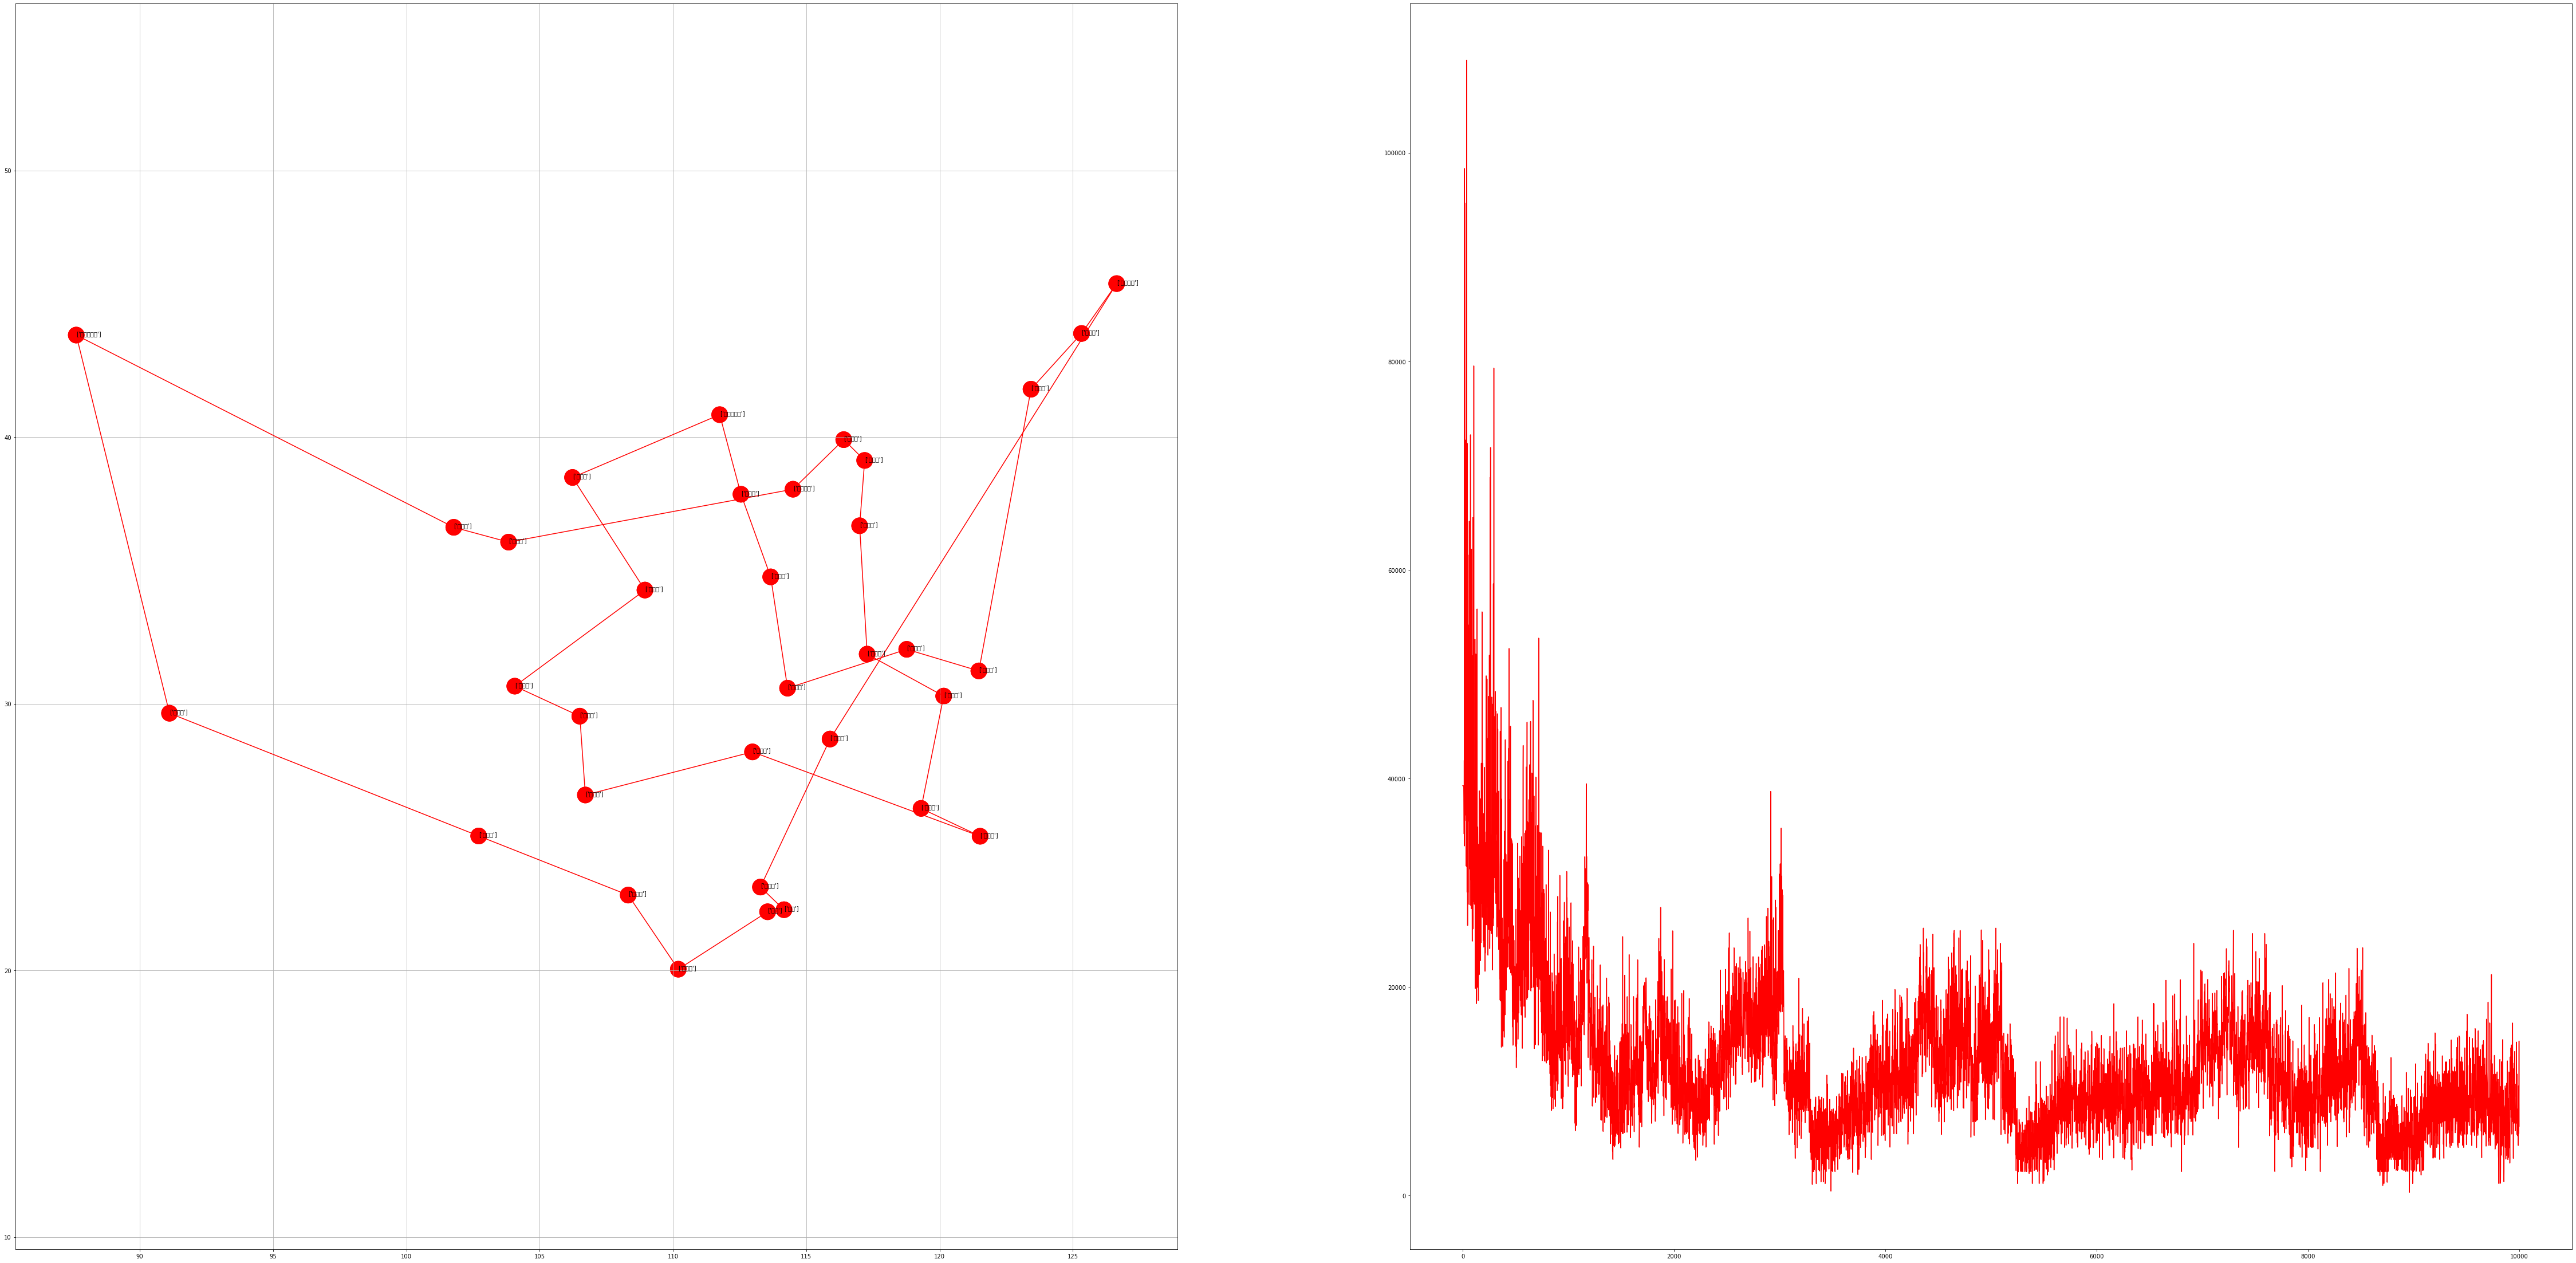

In [74]:
import numpy as np
from matplotlib import pyplot as plt
# 代价函数（具有三角不等式性质）
def price_cn(vec1, vec2):
    return np.linalg.norm(np.array(vec1) - np.array(vec2))


def calc_distance(path):
    dis = 0.0
    for i in range(len(path) - 1):
        dis += distance[path[i]][path[i + 1]]
    return dis


# 得到城市之间的距离矩阵
def get_distance(citys):
    N = len(citys)
    distance = np.zeros((N, N))
    for i, curr_point in enumerate(citys):
        line = []
        [line.append(price_cn(curr_point, other_point)) if i != j else line.append(0.0) for j, other_point in
         enumerate(citys)]
        distance[i] = line
    return distance


# 动态方程计算微分方程du
def calc_du(V, distance):
    a = np.sum(V, axis=0) - 1  # 按列相加
    b = np.sum(V, axis=1) - 1  # 按行相加
    t1 = np.zeros((N, N))
    t2 = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            t1[i, j] = a[j]
    for i in range(N):
        for j in range(N):
            t2[j, i] = b[j]
    # 将第一列移动到最后一列
    c_1 = V[:, 1:N]
    c_0 = np.zeros((N, 1))
    c_0[:, 0] = V[:, 0]
    c = np.concatenate((c_1, c_0), axis=1)
    c = np.dot(distance, c)
    return -A * (t1 + t2) - D * c


# 更新神经网络的输入电压U
def calc_U(U, du, step):
    return U + du * step


# 更新神经网络的输出电压V
def calc_V(U, U0):
    return 1 / 2 * (1 + np.tanh(U / U0))


# 计算当前网络的能量
def calc_energy(V, distance):
    t1 = np.sum(np.power(np.sum(V, axis=0) - 1, 2))
    t2 = np.sum(np.power(np.sum(V, axis=1) - 1, 2))
    idx = [i for i in range(1, N)]
    idx = idx + [0]
    Vt = V[:, idx]
    t3 = distance * Vt
    t3 = np.sum(np.sum(np.multiply(V, t3)))
    e = 0.5 * (A * (t1 + t2) + D * t3)
    return e


# 检查路径的正确性
def check_path(V):
    newV = np.zeros([N, N])
    route = []
    for i in range(N):
        mm = np.max(V[:, i])
        for j in range(N):
            if V[j, i] == mm:
                newV[j, i] = 1
                route += [j]
                break
    return route, newV

# 可视化画出哈密顿回路和能量趋势
def draw_H_and_E(citys, names, H_path, energys):
    fig = plt.figure(figsize=(80, 40))
    # 绘制哈密顿回路
    ax1 = fig.add_subplot(121)
    plt.xlim(80, 130)
    plt.ylim(0, 50)
    for (from_, to_) in H_path:
        p1 = plt.Circle(citys[from_], 0.3, color='red')
        p2 = plt.Circle(citys[to_], 0.3, color='red')

        ax1.add_patch(p1)
        ax1.add_patch(p2)
        ax1.plot((citys[from_][0], citys[to_][0]), (citys[from_][1], citys[to_][1]), color='red')
        #plt.rcParams['font.sans-serif'] = ['Songti SC']
        plt.text(citys[from_][0], citys[from_][1], names[from_])


        #ax1.annotate(text='香港', xy=citys[to_], xytext=(-8, -4), textcoords='offset points', fontsize=20)
    ax1.axis('equal')
    ax1.grid()
    # 绘制能量趋势图
    ax2 = fig.add_subplot(122)
    ax2.plot(np.arange(0, len(energys), 1), energys, color='red')
    plt.show()


if __name__ == '__main__':
    citys = data
    names = name
    distance = get_distance(citys)
    N = len(citys)
    # 设置初始值
    A = N * N
    D = N / 2
    U0 = 0.0009  # 初始电压
    step = 0.0001  # 步长
    num_iter = 10000  # 迭代次数
    # 初始化神经网络的输入状态（电路的输入电压U）
    U = 1 / 2 * U0 * np.log(N - 1) + (2 * (np.random.random((N, N))) - 1)
    # 初始化神经网络的输出状态（电路的输出电压V）
    V = calc_V(U, U0)
    energys = np.array([0.0 for x in range(num_iter)])  # 每次迭代的能量
    best_distance = np.inf  # 最优距离
    best_route = []  # 最优路线
    H_path = []  # 哈密顿回路
    # 开始迭代训练网络
    for n in range(num_iter):
        # 利用动态方程计算du
        du = calc_du(V, distance)
        # 由一阶欧拉法更新下一个时间的输入状态（电路的输入电压U）
        U = calc_U(U, du, step)
        # 由sigmoid函数更新下一个时间的输出状态（电路的输出电压V）
        V = calc_V(U, U0)
        # 计算当前网络的能量E
        energys[n] = calc_energy(V, distance)
        # 检查路径的合法性
        route, newV = check_path(V)
        if len(np.unique(route)) == N:
            route.append(route[0])
            dis = calc_distance(route)
            if dis < best_distance:
                H_path = []
                best_distance = dis
                best_route = route
                [H_path.append((route[i], route[i + 1])) for i in range(len(route) - 1)]
                print('第{}次迭代找到的次优解距离为：{}，能量为：{}，路径为：'.format(n, best_distance, energys[n]))
                [print(chr(97 + v), end=',' if i < len(best_route) - 1 else '\n') for i, v in enumerate(best_route)]
    if len(H_path) > 0:
        draw_H_and_E(citys, names, H_path, energys)
    else:
        print('没有找到最优解')